In [1]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
import random

In [2]:
a,b = make_blobs(n_samples=100,n_features=2, random_state=42)

In [3]:
df = pd.DataFrame(a)

In [4]:
df['t'] = b

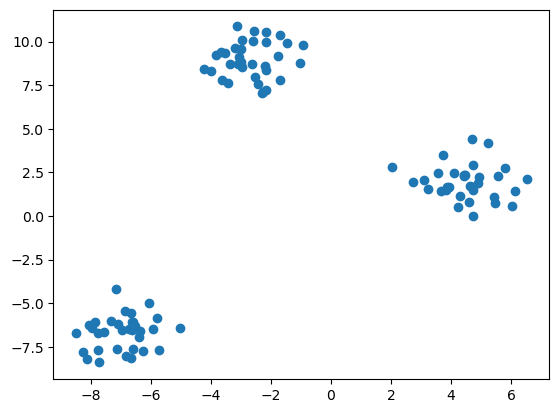

In [52]:
plt.scatter(x=df[0],y=df[1])

In [24]:
idx = random.sample(range(0, a.shape[0]), 2)
center = a[idx]
dist = []
clust = []
for row in a:
    for c in center:
        dist.append(np.sqrt(np.dot(row - c, row - c)))
    min_dist = min(dist)
    idx_d = dist.index(min_dist)
    clust.append(idx_d)
    dist.clear()
    
clust_type = np.unique(clust)
new_center = []
for type in clust_type:
    new_center.append(a[clust==type].mean(axis=0))
        
        

[array([2.49004413, 4.04881853]), array([-5.59903921, -0.90111947])]

array([[-1.04354885,  8.78850983],
       [-3.83738367,  9.21114736]])

In [31]:
centroid = [(-5,5),(5,5)]
cluster_Std = [1,1]

X,y = make_blobs(n_features=2,centers=centroid,cluster_std=cluster_Std,n_samples=100,random_state=2)


class K_Means:  # Making our own class of kmeans and setting cluster to mind centroids and max loop to perform as default, we can change

    def __init__(self, n_cluster=2, max_iter=100):
        self.n_cluster = n_cluster
        self.max_iter = max_iter
        self.center = None

    def fit_predict(self, X):
        random_index = random.sample(range(0, X.shape[0]), self.n_cluster)
        self.center = X[random_index]

        for i in range(self.max_iter):
            #assign centroid
            cluster_group = self.assign_cluster(X) ## assign_cluster function below
            old_Center = self.center
            #move centroild
            self.center = self.move_centroid(X,cluster_group) ## move_centroid function below

            if (old_Center == self.center).all():
                break

        return cluster_group

    def assign_cluster(self, X):
        cluster_group = []
        distances = []

        for row in X:
            for cent in self.center:
                distances.append(np.sqrt(np.dot(row - cent, row - cent)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroid(self, X, cluster_group):
        new_centroid = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroid.append(X[cluster_group == type].mean(axis=0)) # TRICKY CHA CORRESPONDING 0,1 VALUE TO X AAUCHA JUN BATTA

        return np.array(new_centroid)

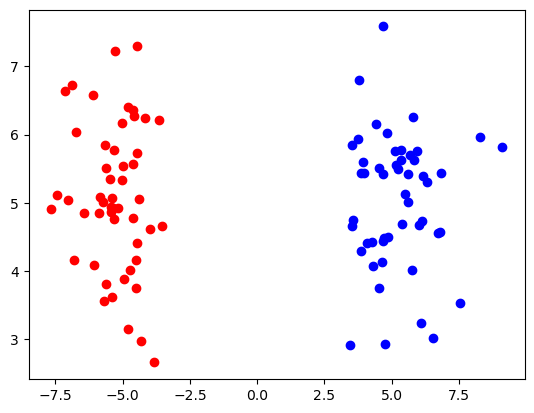

In [32]:
km = K_Means()
y_means = km.fit_predict(X)

plt.scatter(X[y_means==0,0],X[y_means==0,1],color = 'red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue')

In [44]:
y_means

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

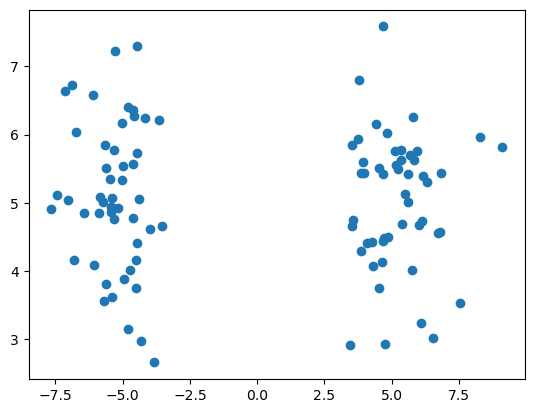

In [61]:
plt.scatter(X[0:100,0],X[0:100,1])

In [63]:
y

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])